In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
rs_params = [(1.0, 1.0),(0.1, 0.1), (0.1, 1.0), (1.0, 0.1)]
stocks = list(roc_results.result_cv_10000.keys())

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'])
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [4]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = 'svm_pca_gdf_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
#df_res.drop(columns=['Unnamed: 0'], inplace=True)
columns = ['C', 'f1', 'features', 'gamma', 'kappa',
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,C,f1,features,gamma,kappa,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
35,100.0,0.601556,gdf_0-50_que,0.001,0.190221,0.191987,0.594991,11946,0.625294,0.199763,0.199985,0.599691,0.1,1.0
16,0.1,0.595059,pca_gdf_que3,0.100,0.183312,0.184655,0.591923,3879,0.576923,0.120317,0.120923,0.560216,0.1,0.1
38,100.0,0.600282,pca_gdf_que1,1.000,0.169434,0.171004,0.584663,3035,0.575083,0.100511,0.100688,0.550177,1.0,1.0
42,1000.0,0.563819,pca_gdf_que_prev10,0.001,0.166019,0.167706,0.583163,7858,0.516934,0.176826,0.181780,0.587530,0.1,1.0
31,10.0,0.626963,gdf_24-26_que_prev,1.000,0.164714,0.166758,0.582027,4320,0.630831,0.160028,0.161926,0.579402,0.1,1.0
17,0.1,0.601108,pca_gdf_que4,1.000,0.157448,0.164031,0.578763,1956,0.601738,0.129149,0.131675,0.564618,1.0,1.0
25,1.0,0.580106,gdf_0-50_que,10.000,0.158407,0.161125,0.579487,9761,0.588349,0.143871,0.144074,0.571888,1.0,0.1
35,100.0,0.612569,gdf_0-50_que_prev,0.001,0.159432,0.160949,0.579515,10484,0.570874,0.117218,0.117880,0.558749,1.0,0.1
28,10.0,0.570876,pca_gdf_que2,0.001,0.153234,0.158249,0.576935,12417,0.594021,0.158500,0.159298,0.579349,1.0,1.0
36,100.0,0.625132,gdf_20_30_que,0.010,0.149926,0.157989,0.575127,13061,0.642194,0.091467,0.098884,0.544805,1.0,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

In [6]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
all_columns = [ 'features', 'matthews_svm', 'matthews_log',  'test_matthews_svm',  'test_matthews_log',
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock', 
               'f1_svm', 'f1_log', 'test_f1_svm', 'test_f1_log', ]
df_all[all_columns]

,features,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock,f1_svm,f1_log,test_f1_svm,test_f1_log
0,gdf_0-50_que,0.191987,0.186824,0.199985,0.203627,0.594991,0.592373,0.599691,0.601087,11946,0.601556,0.595737,0.625294,0.634056
1,pca_gdf_que3,0.184655,0.178656,0.120923,0.120812,0.591923,0.588843,0.560216,0.560288,3879,0.595059,0.589258,0.576923,0.571568
2,pca_gdf_que1,0.171004,0.167115,0.100688,0.099310,0.584663,0.583085,0.550177,0.549537,3035,0.600282,0.588506,0.575083,0.572109
3,pca_gdf_que_prev10,0.167706,0.146384,0.181780,0.171235,0.583163,0.572852,0.587530,0.584512,7858,0.563819,0.551977,0.516934,0.539665
4,gdf_24-26_que_prev,0.166758,0.156657,0.161926,0.163789,0.582027,0.577752,0.579402,0.581178,4320,0.626963,0.610483,0.630831,0.620721
5,pca_gdf_que4,0.164031,0.152838,0.131675,0.133788,0.578763,0.574598,0.564618,0.566273,1956,0.601108,0.598501,0.601738,0.592871
6,gdf_0-50_que,0.161125,0.144700,0.144074,0.132214,0.579487,0.571695,0.571888,0.564652,9761,0.580106,0.593399,0.588349,0.609361
7,gdf_0-50_que_prev,0.160949,0.158982,0.117880,0.103611,0.579515,0.578350,0.558749,0.551208,10484,0.612569,0.611770,0.570874,0.577194
8,pca_gdf_que2,0.158249,0.150172,0.159298,0.154446,0.576935,0.573432,0.579349,0.576707,12417,0.570876,0.591476,0.594021,0.596958
9,gdf_20_30_que,0.157989,0.143094,0.098884,0.110004,0.575127,0.571097,0.544805,0.555039,13061,0.625132,0.590699,0.642194,0.576336


In [16]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

In [17]:
df_all['matthews_diff'].sum(), df_all['matthews_test_diff'].sum()

(0.4385629438591886, 0.03787250258591971)

In [ ]:
sns.distplot(df_all['matthews

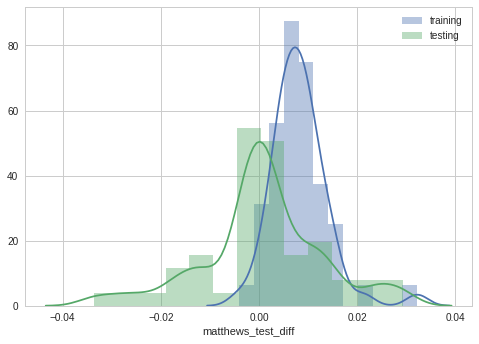

In [22]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

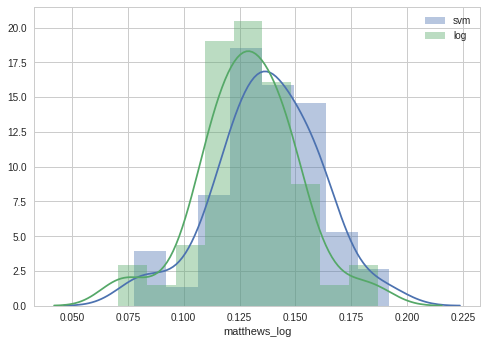

In [23]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [15]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]),len(df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']]), len(df_all)

(50, 24, 53)

In [10]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,features,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock,f1_svm,f1_log,test_f1_svm,test_f1_log
0,gdf_0-50_que,0.191987,0.186824,0.199985,0.203627,0.594991,0.592373,0.599691,0.601087,11946,0.601556,0.595737,0.625294,0.634056
4,gdf_24-26_que_prev,0.166758,0.156657,0.161926,0.163789,0.582027,0.577752,0.579402,0.581178,4320,0.626963,0.610483,0.630831,0.620721
5,pca_gdf_que4,0.164031,0.152838,0.131675,0.133788,0.578763,0.574598,0.564618,0.566273,1956,0.601108,0.598501,0.601738,0.592871
9,gdf_20_30_que,0.157989,0.143094,0.098884,0.110004,0.575127,0.571097,0.544805,0.555039,13061,0.625132,0.590699,0.642194,0.576336
11,gdf_20_30_que,0.155399,0.142170,0.111492,0.130087,0.574786,0.570308,0.547105,0.562736,12255,0.584832,0.561546,0.643533,0.614298
13,pca_gdf_que_prev10,0.153206,0.145601,0.149752,0.153016,0.575160,0.572127,0.574867,0.576301,11869,0.590747,0.582713,0.572864,0.561531
16,gdf_23-27_que,0.151159,0.141480,0.137314,0.138012,0.574996,0.570374,0.568554,0.568830,5836,0.596713,0.573540,0.577995,0.581677
18,que,0.143707,0.137272,0.144933,0.168692,0.571457,0.567489,0.572330,0.583011,3161,0.559996,0.579932,0.561475,0.621412
22,pca_gdf_que_prev10,0.141697,0.132153,0.082844,0.094105,0.568551,0.565317,0.541297,0.547029,12456,0.615052,0.596622,0.565321,0.561743
25,gdf_0-50_que,0.139809,0.136666,0.095048,0.096997,0.568925,0.567394,0.546696,0.547942,4060,0.596915,0.592910,0.578436,0.573308


In [11]:
df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]['features'].value_counts()

gdf_0-50_que          6
gdf_20_30_que         5
gdf_0-50_que_prev     4
pca_gdf_que_prev10    4
pca_gdf_que2          3
que                   3
pca_gdf_que_prev7     3
gdf_24-26_que_prev    3
pca_gdf_que1          3
gdf_23-27_que         2
pca_gdf_que3          2
pca_gdf_que10         2
pca_gdf_que4          2
pca_gdf_que8          1
pca_gdf_que_prev3     1
gdf_20_30_que_prev    1
pca_gdf_que_prev4     1
que_prev              1
pca_gdf_que5          1
pca_gdf_que_prev2     1
gdf_24-26_que         1
Name: features, dtype: int64

In [12]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all)

(48, 53)

In [13]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,features,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock,f1_svm,f1_log,test_f1_svm,test_f1_log
0,gdf_0-50_que,0.191987,0.186824,0.199985,0.203627,0.594991,0.592373,0.599691,0.601087,11946,0.601556,0.595737,0.625294,0.634056
4,gdf_24-26_que_prev,0.166758,0.156657,0.161926,0.163789,0.582027,0.577752,0.579402,0.581178,4320,0.626963,0.610483,0.630831,0.620721
5,pca_gdf_que4,0.164031,0.152838,0.131675,0.133788,0.578763,0.574598,0.564618,0.566273,1956,0.601108,0.598501,0.601738,0.592871
9,gdf_20_30_que,0.157989,0.143094,0.098884,0.110004,0.575127,0.571097,0.544805,0.555039,13061,0.625132,0.590699,0.642194,0.576336
11,gdf_20_30_que,0.155399,0.142170,0.111492,0.130087,0.574786,0.570308,0.547105,0.562736,12255,0.584832,0.561546,0.643533,0.614298
13,pca_gdf_que_prev10,0.153206,0.145601,0.149752,0.153016,0.575160,0.572127,0.574867,0.576301,11869,0.590747,0.582713,0.572864,0.561531
16,gdf_23-27_que,0.151159,0.141480,0.137314,0.138012,0.574996,0.570374,0.568554,0.568830,5836,0.596713,0.573540,0.577995,0.581677
18,que,0.143707,0.137272,0.144933,0.168692,0.571457,0.567489,0.572330,0.583011,3161,0.559996,0.579932,0.561475,0.621412
22,pca_gdf_que_prev10,0.141697,0.132153,0.082844,0.094105,0.568551,0.565317,0.541297,0.547029,12456,0.615052,0.596622,0.565321,0.561743
25,gdf_0-50_que,0.139809,0.136666,0.095048,0.096997,0.568925,0.567394,0.546696,0.547942,4060,0.596915,0.592910,0.578436,0.573308


In [14]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,features,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock,f1_svm,f1_log,test_f1_svm,test_f1_log
0,gdf_0-50_que,0.191987,0.186824,0.199985,0.203627,0.594991,0.592373,0.599691,0.601087,11946,0.601556,0.595737,0.625294,0.634056
1,pca_gdf_que3,0.184655,0.178656,0.120923,0.120812,0.591923,0.588843,0.560216,0.560288,3879,0.595059,0.589258,0.576923,0.571568
4,gdf_24-26_que_prev,0.166758,0.156657,0.161926,0.163789,0.582027,0.577752,0.579402,0.581178,4320,0.626963,0.610483,0.630831,0.620721
5,pca_gdf_que4,0.164031,0.152838,0.131675,0.133788,0.578763,0.574598,0.564618,0.566273,1956,0.601108,0.598501,0.601738,0.592871
9,gdf_20_30_que,0.157989,0.143094,0.098884,0.110004,0.575127,0.571097,0.544805,0.555039,13061,0.625132,0.590699,0.642194,0.576336
11,gdf_20_30_que,0.155399,0.142170,0.111492,0.130087,0.574786,0.570308,0.547105,0.562736,12255,0.584832,0.561546,0.643533,0.614298
13,pca_gdf_que_prev10,0.153206,0.145601,0.149752,0.153016,0.575160,0.572127,0.574867,0.576301,11869,0.590747,0.582713,0.572864,0.561531
16,gdf_23-27_que,0.151159,0.141480,0.137314,0.138012,0.574996,0.570374,0.568554,0.568830,5836,0.596713,0.573540,0.577995,0.581677
18,que,0.143707,0.137272,0.144933,0.168692,0.571457,0.567489,0.572330,0.583011,3161,0.559996,0.579932,0.561475,0.621412
22,pca_gdf_que_prev10,0.141697,0.132153,0.082844,0.094105,0.568551,0.565317,0.541297,0.547029,12456,0.615052,0.596622,0.565321,0.561743
